In [58]:
# Importing the Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
warnings.filterwarnings('ignore')

In [3]:
tel=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [5]:
tel.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Checking Null values

In [6]:
tel.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the data

In [7]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
tel.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3312-UUMZW,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [9]:
tel['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
tel['TotalCharges'].dtype

dtype('O')

We could see that TotalCharges is of object type. 

In [11]:
tel[tel['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
# There are white-spaces present in the total charges
tel['TotalCharges']=tel['TotalCharges'].replace(' ',np.nan)

In [13]:
tel.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in total charges column

In [14]:
#dropping null values as there are very less rows with null values
tel.dropna(inplace=True)

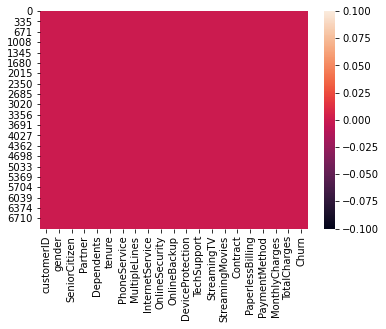

In [15]:
sns.heatmap(tel.isnull())
plt.show()

In [16]:
tel['TotalCharges']=tel['TotalCharges'].astype(float)

In [17]:
#we have chaged the data type successfully
tel['TotalCharges'].dtype

dtype('float64')

**Data Visualisation:**

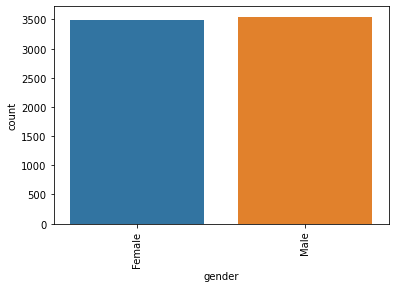

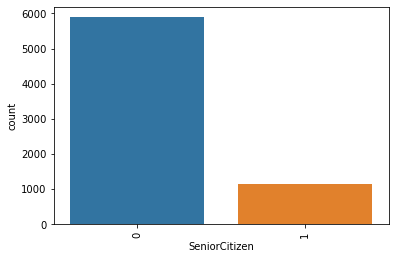

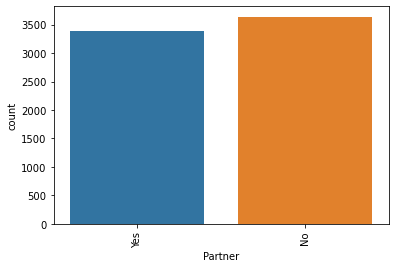

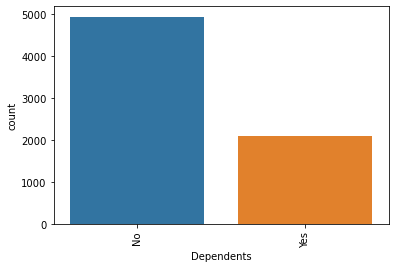

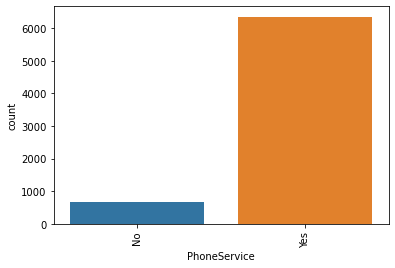

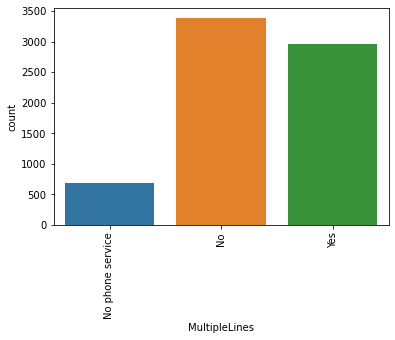

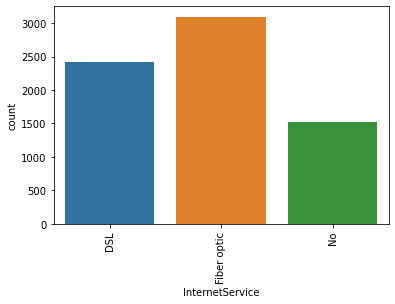

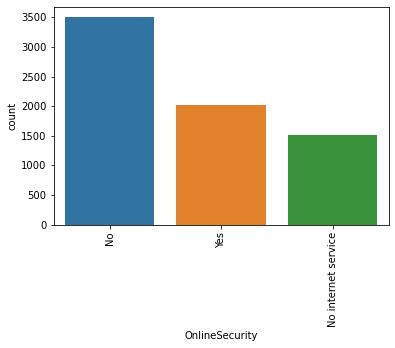

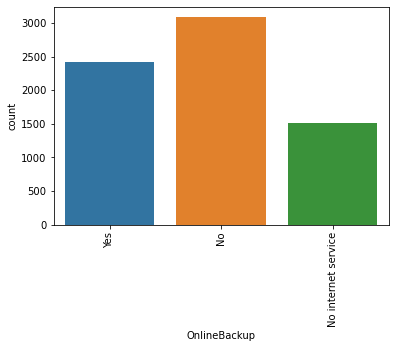

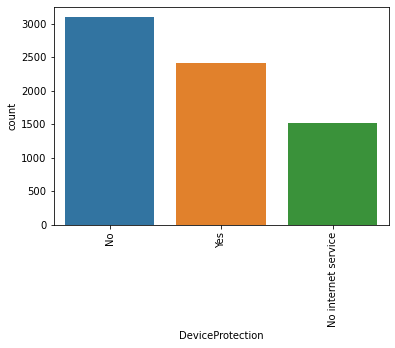

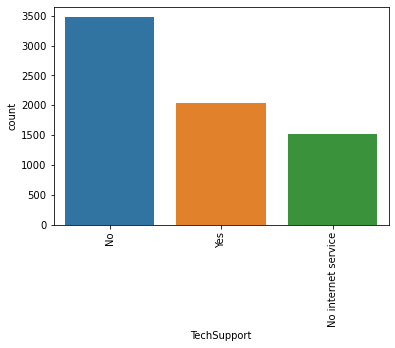

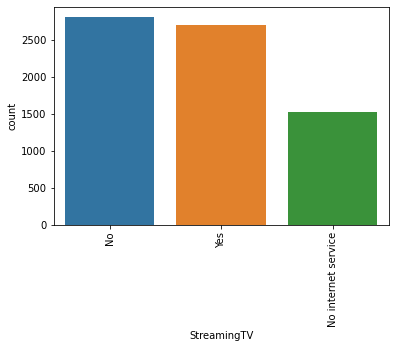

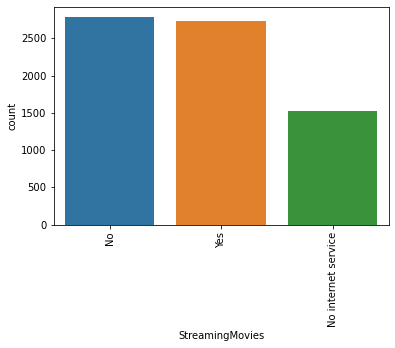

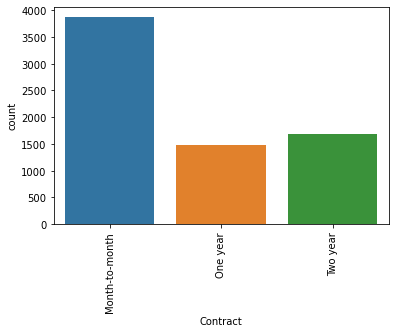

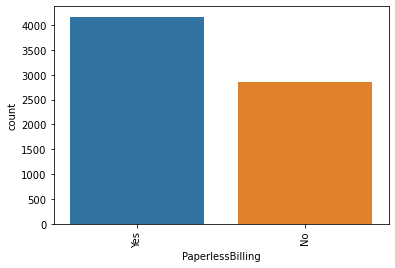

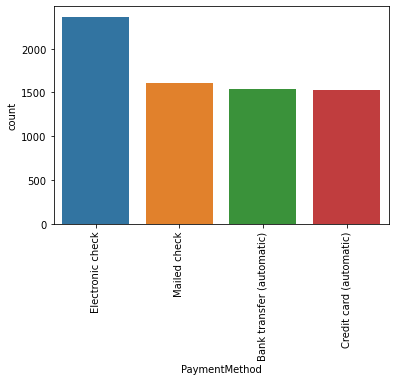

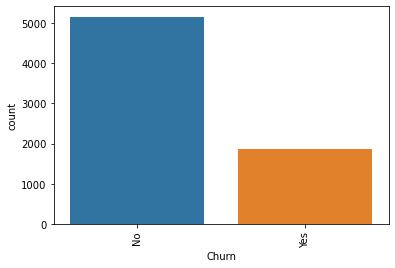

In [18]:
for i in tel.columns:
    if i=='customerID' or i=='tenure':
        continue
    elif tel[i].dtype=='int64':
        sns.countplot(x=i,data=tel)
        plt.xticks(rotation=90)
        plt.show()  
    elif tel[i].dtype=='O':
        sns.countplot(x=i,data=tel)
        plt.xticks(rotation=90)
        plt.show()   

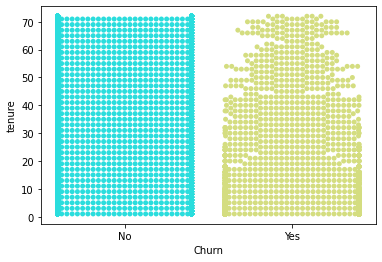

In [19]:
sns.swarmplot(x='Churn',y='tenure',data=tel,palette='rainbow')
plt.show()

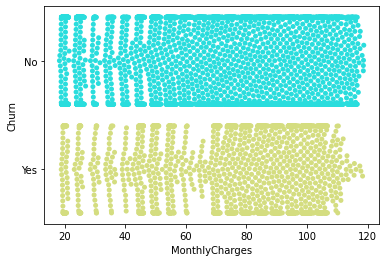

In [20]:
sns.swarmplot(x='MonthlyCharges',y='Churn',data=tel,palette='rainbow')
plt.show()

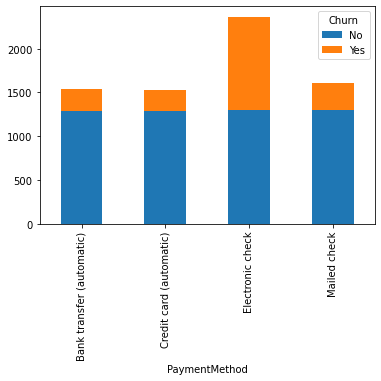

In [21]:
pd.crosstab(tel['PaymentMethod'], tel['Churn']).plot(kind='bar', stacked=True)
plt.show()

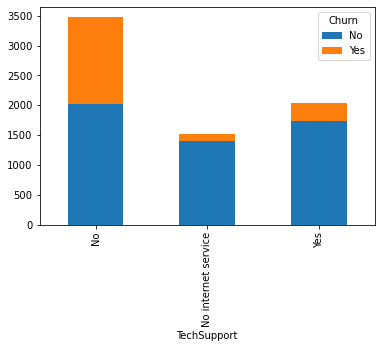

In [22]:
pd.crosstab(tel['TechSupport'], tel['Churn']).plot(kind='bar', stacked=True)
plt.show()

**People with no techsupport tend to leave**

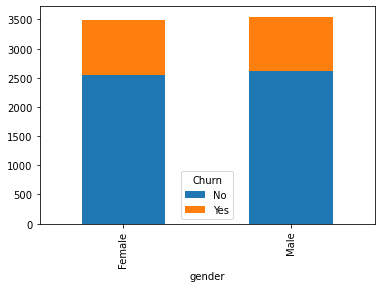

In [23]:
pd.crosstab(tel['gender'], tel['Churn']).plot(kind='bar', stacked=True)
plt.show()

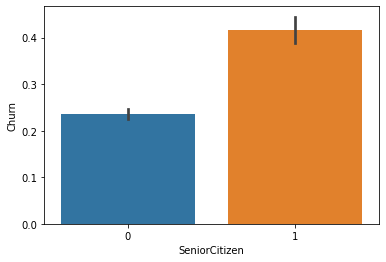

In [69]:
sns.barplot(tel['SeniorCitizen'], tel['Churn'])
plt.show()

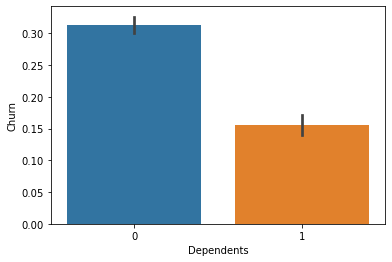

In [70]:
sns.barplot(tel['Dependents'], tel['Churn'])
plt.show()

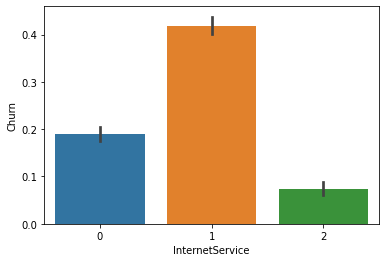

In [71]:
sns.barplot(tel[''], tel['Churn'])
plt.show()

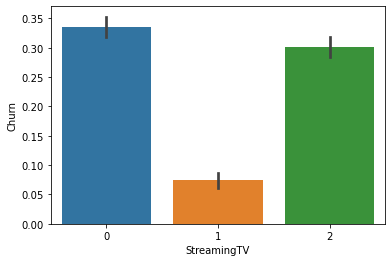

In [73]:
sns.barplot(tel['StreamingTV'], tel['Churn'])
plt.show()

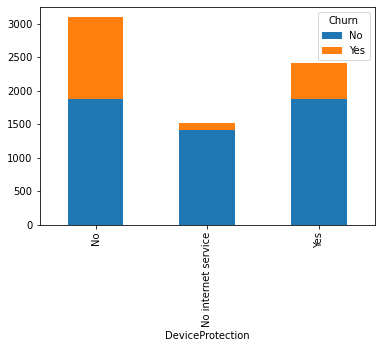

In [24]:
pd.crosstab(tel['DeviceProtection'], tel['Churn']).plot(kind='bar', stacked=True)
plt.show()

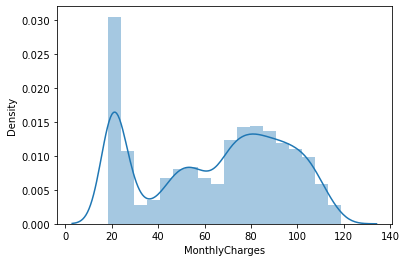

In [25]:
sns.distplot(tel['MonthlyCharges'])
plt.show()

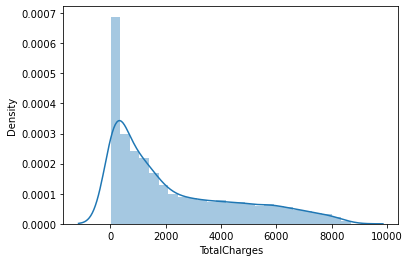

In [26]:
sns.distplot(tel['TotalCharges'])
plt.show()

**Encoding Categorical Columns**

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in tel.columns:
    if tel[i].dtype==object:
        tel[i]=le.fit_transform((tel[i].astype(str)))

In [28]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
tel.corr()['Churn'].sort_values()

Contract           -0.396150
tenure             -0.354049
OnlineSecurity     -0.289050
TechSupport        -0.282232
TotalCharges       -0.199484
OnlineBackup       -0.195290
DeviceProtection   -0.177883
Dependents         -0.163128
Partner            -0.149982
InternetService    -0.047097
StreamingMovies    -0.038802
StreamingTV        -0.036303
customerID         -0.017858
gender             -0.008545
PhoneService        0.011691
MultipleLines       0.038043
PaymentMethod       0.107852
SeniorCitizen       0.150541
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

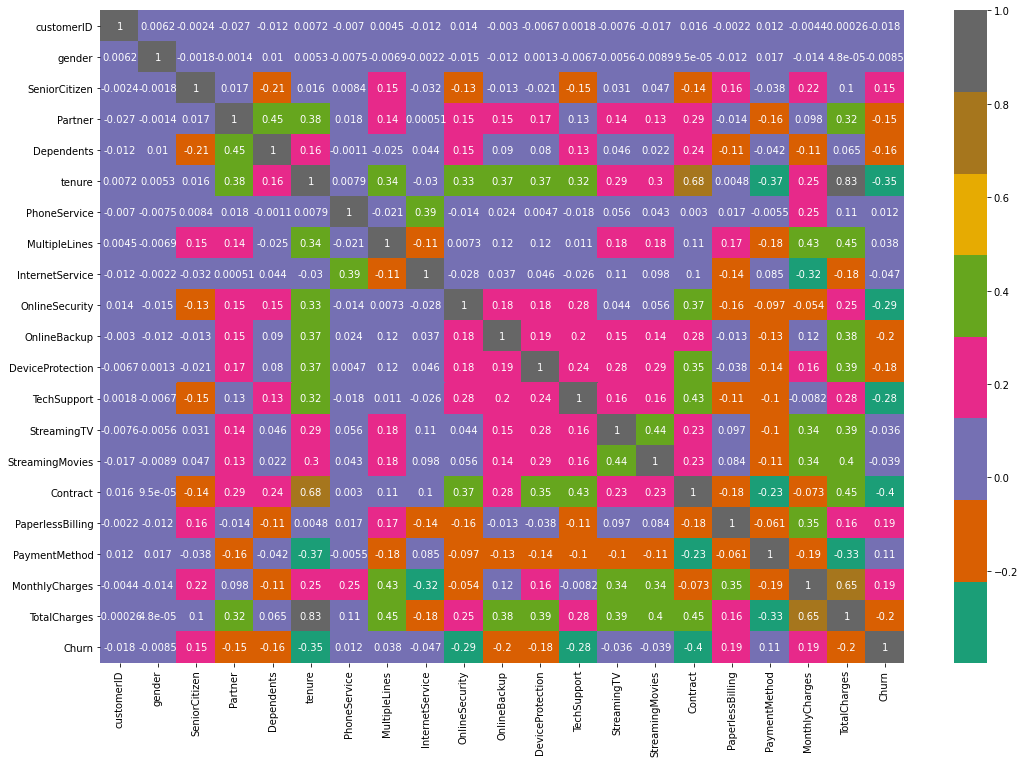

In [30]:
plt.figure(figsize=(18,12))
sns.heatmap(tel.corr(),annot=True,cmap='Dark2')
plt.show()

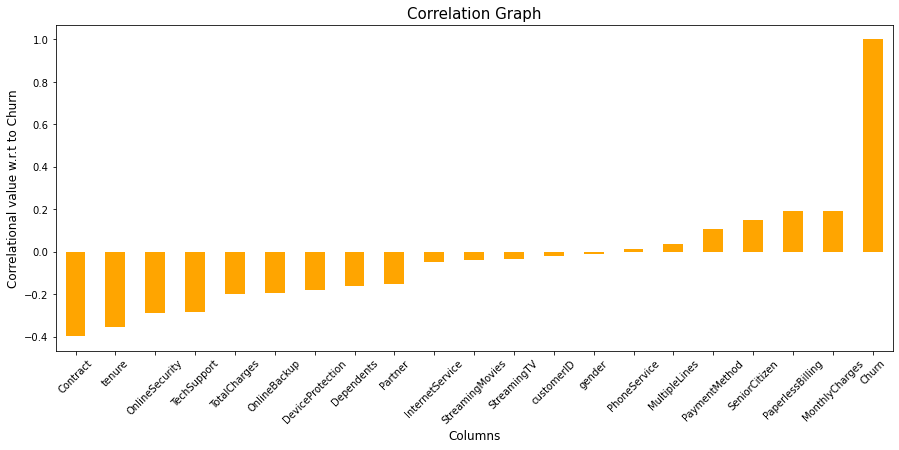

In [31]:
plt.figure(figsize=(15,6))
tel.corr()['Churn'].sort_values().plot(kind='bar',color='orange')
plt.title('Correlation Graph',size=15)
plt.ylabel('Correlational value w.r.t to Churn',size=12)
plt.xlabel('Columns',size=12)
plt.xticks(rotation=45)
plt.show()

# Skewness:

In [32]:
tel.skew().sort_values()

PhoneService       -2.729727
PaperlessBilling   -0.377503
MonthlyCharges     -0.222103
PaymentMethod      -0.169388
gender             -0.018776
customerID          0.000000
StreamingMovies     0.013851
StreamingTV         0.029366
Partner             0.070024
MultipleLines       0.118623
OnlineBackup        0.184089
DeviceProtection    0.188013
InternetService     0.205704
tenure              0.237731
TechSupport         0.403966
OnlineSecurity      0.418619
Contract            0.635149
Dependents          0.880908
TotalCharges        0.961642
Churn               1.060622
SeniorCitizen       1.831103
dtype: float64

We could see a high skewness is present in the total Charges column.Rest skewnes is present in the categorical columns.

In [33]:
# Handling Skewness
tel['TotalCharges']=np.log(tel['TotalCharges'])

In [34]:
tel['TotalCharges'].skew()

-0.7535741253284722

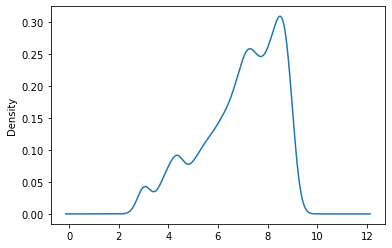

In [35]:
tel['TotalCharges'].plot(kind='kde')
plt.show()

# Ouliers Detection:

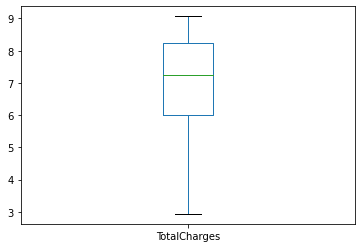

In [36]:
tel['TotalCharges'].plot(kind='box')
plt.show()

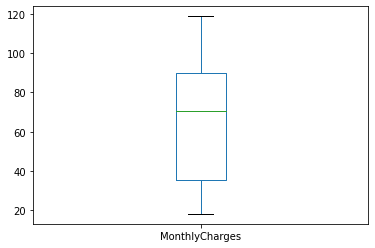

In [37]:
tel['MonthlyCharges'].plot(kind='box')
plt.show()

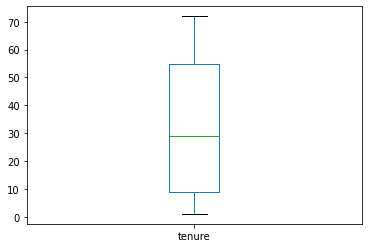

In [38]:
tel['tenure'].plot(kind='box')
plt.show()

There are no Outliers

In [42]:
# Feature Selection:
tel.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int32  
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int32  
 8   InternetService   7032 non-null   int32  
 9   OnlineSecurity    7032 non-null   int32  
 10  OnlineBackup      7032 non-null   int32  
 11  DeviceProtection  7032 non-null   int32  
 12  TechSupport       7032 non-null   int32  
 13  StreamingTV       7032 non-null   int32  
 14  StreamingMovies   7032 non-null   int32  
 15  Contract          7032 non-null   int32  
 16  PaperlessBilling  7032 non-null   int32  


In [43]:
tel.drop('customerID',axis=1,inplace=True)

# Splitting the data into features and vectors

In [46]:
x= tel.drop('Churn',axis=1)
y= tel["Churn"]

In [47]:
log=LogisticRegression() 
maxaccu=0
for i in range(100):   
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=i)
    log.fit(xtrain,ytrain)
    pred_log=log.predict(xtest)
    acc_log=accuracy_score(pred_log,ytest)
    if maxaccu < acc_log:
        maxaccu = acc_log
        randomstate = i
print(f"Maximum acuuracy is: {maxaccu} at random state: {randomstate}")

Maximum acuuracy is: 0.8265813788201848 at random state: 14


In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=80)

**LogisticRegression**

In [49]:
log.fit(xtrain,ytrain)
pred_log=log.predict(xtest)
print('Accuracy Score: ',acc_log*100,'%\n\n')
print(confusion_matrix(ytest , pred_log),'\n\n')
print(classification_report(ytest , pred_log))

Accuracy Score:  82.08955223880598 %


[[917  92]
 [186 212]] 


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1009
           1       0.70      0.53      0.60       398

    accuracy                           0.80      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.79      0.80      0.79      1407



**RandomForestClassifier**

In [50]:
random_forest = RandomForestClassifier()
random_forest.fit(xtrain, ytrain)
pred_r = random_forest.predict(xtest)
acc_r = accuracy_score(ytest , pred_r)*100
print('Accuracy Score: ',acc_r,'%\n\n')
print(confusion_matrix(ytest , pred_r),'\n\n')
print(classification_report(ytest , pred_r))

Accuracy Score:  79.24662402274343 %


[[936  73]
 [219 179]] 


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1009
           1       0.71      0.45      0.55       398

    accuracy                           0.79      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**SVC**

In [51]:
svc = SVC()
svc.fit(xtrain, ytrain)
pred_svc = svc.predict(xtest)
acc_svc = accuracy_score(ytest , pred_svc)*100
print('Accuracy Score: ',acc_svc,'%\n\n')
print(confusion_matrix(ytest , pred_svc),'\n\n')
print(classification_report(ytest , pred_svc))

Accuracy Score:  78.39374555792466 %


[[937  72]
 [232 166]] 


              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1009
           1       0.70      0.42      0.52       398

    accuracy                           0.78      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.77      0.78      0.76      1407



**DecisionTreeClassifier**

In [52]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(xtrain, ytrain)
pred_dt =decisiontree.predict(xtest)
acc_dt = accuracy_score(ytest , pred_dt)*100
print('Accuracy Score: ',acc_dt,'%\n\n')
print(confusion_matrix(ytest , pred_dt),'\n\n')
print(classification_report(ytest , pred_dt))

Accuracy Score:  70.43354655294954 %


[[819 190]
 [226 172]] 


              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1009
           1       0.48      0.43      0.45       398

    accuracy                           0.70      1407
   macro avg       0.63      0.62      0.63      1407
weighted avg       0.70      0.70      0.70      1407



**KNeighborsClassifier**

In [53]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(xtrain, ytrain)
pred_knn = knn.predict(xtest)
acc_knn = accuracy_score(ytest , pred_knn)*100
print('Accuracy Score: ',acc_knn,'%\n\n')
print(confusion_matrix(ytest , pred_knn),'\n\n')
print(classification_report(ytest , pred_knn))

Accuracy Score:  77.61194029850746 %


[[893 116]
 [199 199]] 


              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1009
           1       0.63      0.50      0.56       398

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



# Cross Validation Score

In [56]:
ls = cross_val_score(log, x, y, cv=5)
print('cross_val_score of LogisticRegression:',ls.mean()*100)

cross_val_score of LogisticRegression: 80.70230032523827


In [57]:
ls = cross_val_score(random_forest, x, y, cv=5)
print('cross_val_score of random_forest:',ls.mean()*100)

cross_val_score of random_forest: 78.66897983158785


**The best model is LogisticRegression**

# Hyper parameter tuning

In [61]:
param_grid = {'C':np.logspace(-5, 8, 15)}
log_cv = GridSearchCV(log, param_grid, cv = 5)
log_cv.fit(xtrain, ytrain)
print("Tuned Logistic Regression Parameters:",log_cv.best_params_) 
print("Best score is ",log_cv.best_score_)

Tuned Logistic Regression Parameters: {'C': 11787686.347935867}
Best score is  0.8062222222222222


# ROC AUC Curve

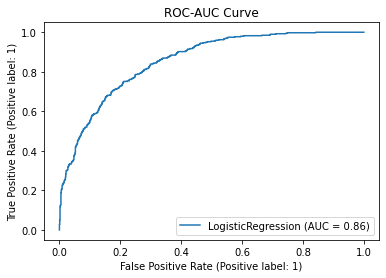

In [63]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_cv.best_estimator_, xtest, ytest)
plt.title('ROC-AUC Curve')
plt.show()

# Saving the model

In [64]:
import pickle
filename='Churn_prediction.pkl'
pickle.dump(log,open(filename,'wb'))